In [1]:
import numpy as np

In [2]:
x = np.array([-4, 3, -1, 1, 3, 4])
y = np.array([2, 1, 1, -1, -1, -2]) 

data = np.array([x, y]).T
print(data)

[[-4  2]
 [ 3  1]
 [-1  1]
 [ 1 -1]
 [ 3 -1]
 [ 4 -2]]


In [3]:
mean = np.mean(data, axis=0, keepdims=True)

mean

array([[1., 0.]])

In [4]:
# create a 6x1 matrix with ones
ones = np.ones((6, 1))

mean_vector = mean * ones
mean_vector

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [5]:
# subtract the mean from the data
data_centered = data - mean_vector
data_centered

array([[-5.,  2.],
       [ 2.,  1.],
       [-2.,  1.],
       [ 0., -1.],
       [ 2., -1.],
       [ 3., -2.]])

In [11]:
# calculate the covariance matrix
# we need to transpose the data because np.cov expects the data to be in the form of rows 
# and we have it in the form of columns
cov_matrix = np.cov(data_centered.T)
cov_matrix

array([[ 9.2, -3.6],
       [-3.6,  2.4]])

In [13]:
# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix) 

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.91832008  0.39583865]
 [-0.39583865  0.91832008]]

Eigenvalues 
[10.75176736  0.84823264]


In [20]:
eig_vals[0]

10.75176736125598

In [23]:
eig_vecs[:, 0]

array([ 0.91832008, -0.39583865])

In [24]:
principal_eigenvector = eig_vecs[:, 0]
principal_eigenvector

array([ 0.91832008, -0.39583865])

In [25]:
# Project the centered data onto the principal component
principal_component = data_centered.dot(principal_eigenvector)

In [26]:
principal_component

array([-5.38327768,  1.44080151, -2.2324788 ,  0.39583865,  2.2324788 ,
        3.54663753])

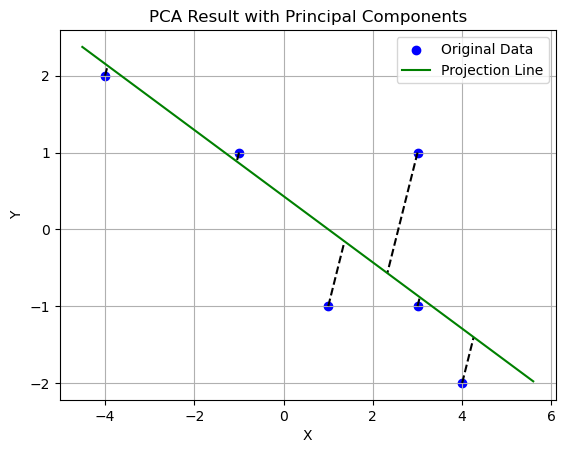

In [40]:
import matplotlib.pyplot as plt

# Plot the original data
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Original Data')

# Plot the principal component vector
# plt.quiver(mean[0, 0], mean[0, 1], principal_eigenvector[0], principal_eigenvector[1], scale=5, color='red', label='Principal Component')

# Plot the projections of the data onto the principal component
for i in range(data_centered.shape[0]):
    plt.plot([data[i, 0], mean[0, 0] + principal_component[i] * principal_eigenvector[0]],
             [data[i, 1], mean[0, 1] + principal_component[i] * principal_eigenvector[1]],
             'k--')
    
    
# Draw the line which the data is projected onto
line_start = mean[0] - 6 * principal_eigenvector
line_end = mean[0] + 5 * principal_eigenvector
plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'g-', label='Projection Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('PCA Result with Principal Components')
plt.grid(True)
plt.show()

In [37]:
# calculate the slope of the line
slope = principal_eigenvector[1] / principal_eigenvector[0]
slope

-0.43104648923777183